In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 7.1 Polynomial Regression

In [3]:
Wage = pd.read_csv("data/Wage.csv")
Wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


**FIGURE 7.1.**

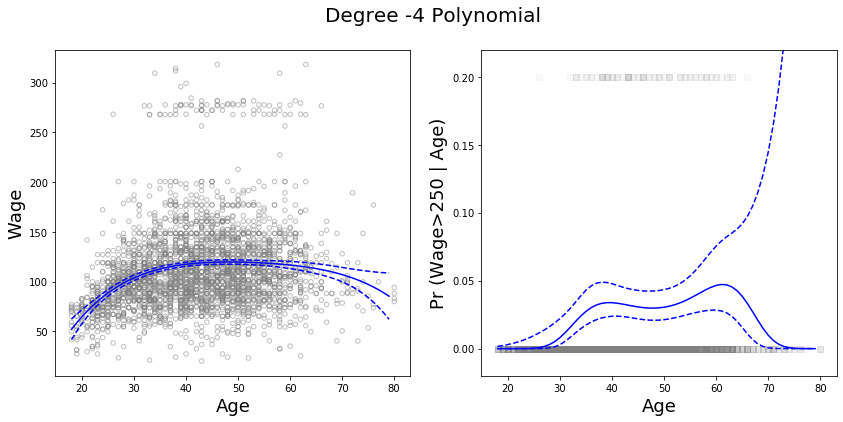

In [4]:
#这里使用的是非poly函数的正交基（难以实现，在实验里尝试用R语言生成的正交基）
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
results_age_d4 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',4)),data = Wage).fit()
results_age_d4_logit = smf.glm('I(wage >250) ~  {}'.format(patsy_model_poly('age',4)),data = Wage, family = sm.families.Binomial()).fit()
agelims = np.arange(Wage['age'].min(),Wage['age'].max())
age_grid  = pd.DataFrame(agelims,columns = ['age'])
preds = results_age_d4.get_prediction(age_grid)
preds_logit = results_age_d4_logit.get_prediction(age_grid)
preds_summary = preds.summary_frame()
preds_summary_logit = preds_logit.summary_frame()
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.5)
plt.plot(agelims,preds_summary['mean'],'b')
plt.plot(agelims,preds_summary['mean_ci_lower'],'b--')
plt.plot(agelims,preds_summary['mean_ci_upper'],'b--')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Wage',fontsize=18)
plt.subplot(1,2,2)
plt.scatter(Wage['age'],(Wage['wage'] > 250)*0.2,color='gray', marker='s', edgecolors='gray',alpha = 0.05)
plt.plot(agelims,1 - preds_logit.predicted_mean,'b')
plt.plot(agelims,1 - preds_summary_logit['mean_ci_lower'],'b--')
plt.plot(agelims,1 - preds_summary_logit['mean_ci_upper'],'b--')
plt.ylim(-0.02,0.22)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Pr (Wage>250 | Age)',fontsize=18)
plt.suptitle('Degree -4 Polynomial',fontsize=20)
plt.show()

# 7.2 Step Functions

**FIGURE 7.2.**

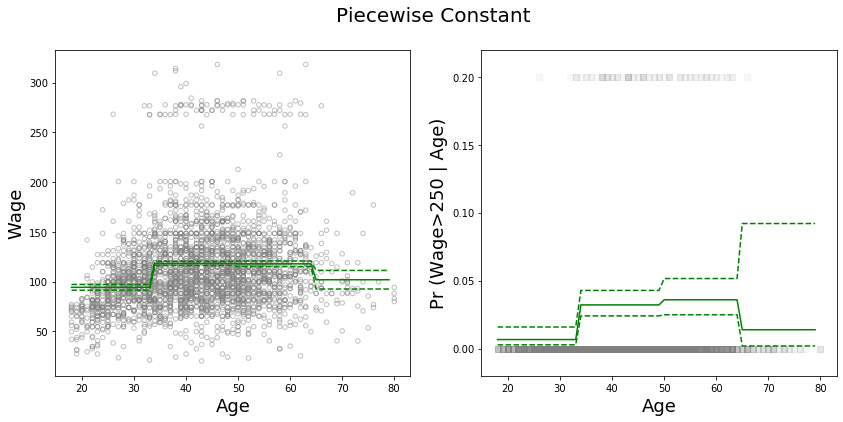

In [5]:
Wage_cut = Wage.copy()
Wage_cut['age_cut'] = pd.cut(Wage['age'],4)
results_age_cut = smf.ols('wage ~ age_cut',data = Wage_cut).fit()
results_age_cut_logit = smf.glm('I(wage >250) ~  age_cut',data = Wage_cut, family = sm.families.Binomial()).fit()
agelims_cut = pd.cut(agelims,Wage_cut['age_cut'].values.categories)
age_grid_cut  = pd.DataFrame(agelims_cut,columns = ['age_cut'])
preds = results_age_cut.get_prediction(age_grid_cut)
preds_logit = results_age_cut_logit.get_prediction(age_grid_cut)
preds_summary = preds.summary_frame()
preds_summary_logit = preds_logit.summary_frame()
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.5)
plt.plot(agelims,preds_summary['mean'],'g')
plt.plot(agelims,preds_summary['mean_ci_lower'],'g--')
plt.plot(agelims,preds_summary['mean_ci_upper'],'g--')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Wage',fontsize=18)
plt.subplot(1,2,2)
plt.scatter(Wage['age'],(Wage['wage'] > 250)*0.2,color='gray', marker='s', edgecolors='gray',alpha = 0.05)
plt.plot(agelims,1 - preds_logit.predicted_mean,'g')
plt.plot(agelims,1 - preds_summary_logit['mean_ci_lower'],'g--')
plt.plot(agelims,1 - preds_summary_logit['mean_ci_upper'],'g--')
plt.ylim(-0.02,0.22)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Pr (Wage>250 | Age)',fontsize=18)
plt.suptitle('Piecewise Constant',fontsize=20)
plt.show()

# 7.3 Basis Functions

# 7.4 Regression Splines

**7.4.1 Piecewise Polynomials**

**7.4.2 Constraints and Splines**

**Figure 7.3**

In [6]:
Wage_young = Wage[Wage['age'] < 50]
Wage_old = Wage[Wage['age'] >= 50]
age_grid_young = age_grid[age_grid['age'] <= 50]
age_grid_old = age_grid[age_grid['age'] >= 50]

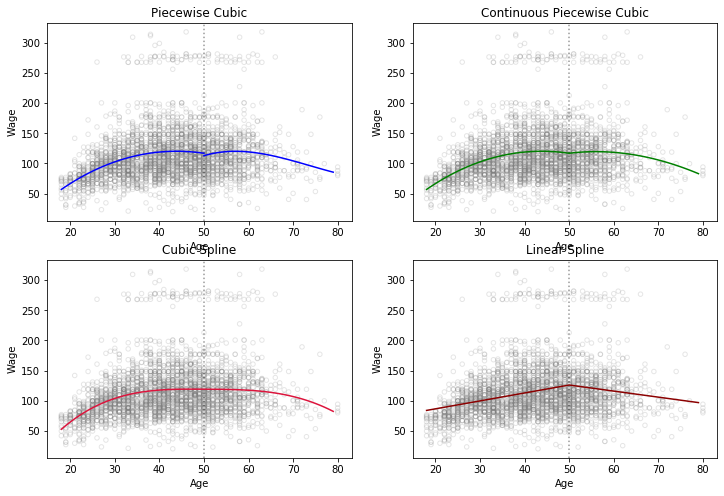

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.axvline(50,linestyle = ':',color = 'black',alpha = 0.4)
fit1_young = smf.ols('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_young).fit()
fit1_old = smf.ols('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_old).fit()
preds1_young = fit1_young.predict(age_grid_young)
preds1_old = fit1_old.predict(age_grid_old)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.2)
plt.plot(age_grid_young,preds1_young,'b')
plt.plot(age_grid_old,preds1_old,'b')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Piecewise Cubic')
plt.subplot(2,2,2)
plt.axvline(50,linestyle = ':',color = 'black',alpha = 0.4)
fit1_young = smf.ols('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_young).fit()
boundary_value = fit1_young.predict({'age':50})[0]
constraints_condition = 'Intercept + age * 50 + I(age ** 2) * 2500 + I(age ** 3) * 125000 = {}'.format(boundary_value)
#注意只有glm可以使用fit_constrained
fit1_old = smf.glm('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_old).fit_constrained(constraints_condition)
preds1_young = fit1_young.predict(age_grid_young)
preds1_old = fit1_old.predict(age_grid_old)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.2)
plt.plot(age_grid_young,preds1_young,'g')
plt.plot(age_grid_old,preds1_old,'g')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Continuous Piecewise Cubic')
plt.subplot(2,2,3)
plt.axvline(50,linestyle = ':',color = 'black',alpha = 0.4)
fit3 = smf.ols('wage ~ bs(age,knots=(50,),degree =3)',data = Wage).fit()
preds3 = fit3.predict(age_grid)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.2)
plt.plot(agelims,preds3,'crimson')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Cubic Spline')
plt.subplot(2,2,4)
plt.axvline(50,linestyle = ':',color = 'black',alpha = 0.4)
fit4 = smf.ols('wage ~ bs(age,knots=(50,),degree =1)',data = Wage).fit()
preds4 = fit4.predict(age_grid)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.2)
plt.plot(agelims,preds4,'darkred')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Linear Spline')
plt.show()

**7.4.3 The Spline Basis Representation**

**FIGURE 7.4.**

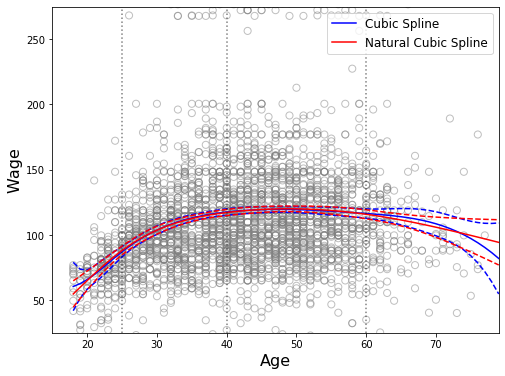

In [8]:
plt.figure(figsize=(8,6))
fit = smf.ols('wage ~ bs(age,knots=(25,40,60),degree =3)',data = Wage).fit()
#In patsy,cr() generates a natural cubic spline basis 
fit2 = smf.ols('wage ~ cr(age,knots=(25,40,60))',data = Wage).fit()
preds = fit.get_prediction(age_grid)
preds2 = fit2.get_prediction(age_grid)
preds_summary = preds.summary_frame()
preds_summary2 = preds2.summary_frame()
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=50,alpha = 0.5)
plt.plot(agelims,preds_summary['mean'],'b', label='Cubic Spline')
plt.plot(agelims,preds_summary2['mean'],'r', label='Natural Cubic Spline')
plt.plot(agelims,preds_summary['mean_ci_lower'],'b--')
plt.plot(agelims,preds_summary['mean_ci_upper'],'b--')
plt.plot(agelims,preds_summary2['mean_ci_lower'],'r--')
plt.plot(agelims,preds_summary2['mean_ci_upper'],'r--')
[plt.axvline(i ,linestyle = ':',color = 'black',alpha = 0.5) for i in [25,40,60]]
plt.xlabel('Age',fontsize=16)
plt.ylabel('Wage',fontsize=16)
plt.legend(['Cubic Spline','Natural Cubic Spline'],fontsize=12)
plt.xlim(15,79)
plt.ylim(25,275)
plt.show()

**7.4.4 Choosing the Number and Locations of the Knots**

**FIGURE 7.5.**

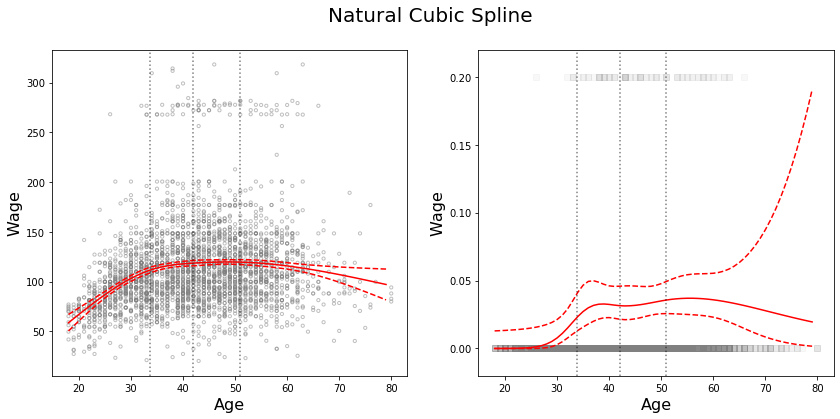

In [9]:
#这里指定knots而不是df= 4，为了便于作图（axvlin）
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
knots = np.percentile(Wage.age, 25),np.median(Wage.age),np.percentile(Wage.age, 75)
fit1 = smf.ols('wage ~ cr(age,knots={})'.format(knots), data=Wage).fit()
preds1 = fit1.get_prediction(age_grid)
preds_summary1 = preds1.summary_frame()
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=10,alpha = 0.5)
plt.plot(agelims,preds_summary1['mean'],'r')
plt.plot(agelims,preds_summary1['mean_ci_lower'],'r--')
plt.plot(agelims,preds_summary1['mean_ci_upper'],'r--')
[plt.axvline(i ,linestyle = ':',color = 'black',alpha = 0.5) for i in knots]
plt.xlabel('Age',fontsize=16)
plt.ylabel('Wage',fontsize=16)
plt.subplot(1,2,2)
fit2 = smf.glm('I(wage <250) ~  cr(age,knots={})'.format(knots),data = Wage, family = sm.families.Binomial()).fit()
preds2 = fit2.get_prediction(age_grid)
preds_summary2 = preds2.summary_frame()
plt.scatter(Wage['age'],(Wage['wage'] > 250)*0.2,color='gray', marker='s', edgecolors='gray',alpha = 0.05)
plt.plot(agelims,preds_summary2['mean'],'r')
plt.plot(agelims,preds_summary2['mean_ci_lower'],'r--')
plt.plot(agelims,preds_summary2['mean_ci_upper'],'r--')
[plt.axvline(i ,linestyle = ':',color = 'black',alpha = 0.5) for i in  knots]
plt.xlabel('Age',fontsize=16)
plt.ylabel('Wage',fontsize=16)
plt.suptitle('Natural Cubic Spline',fontsize=20)
plt.show()

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
#编写函数便于生成MSR
def model_msr(data,ols_model,dmatrices_model,n_splits):
    kf = KFold(n_splits=n_splits, random_state=1,shuffle=True)
    kf.get_n_splits(data)
    msr = []
    for train_index, test_index in kf.split(data):
        results = smf.ols(ols_model , data = data.iloc[train_index]).fit()
        y_test ,X_test = patsy.dmatrices(dmatrices_model,data.iloc[test_index], return_type="dataframe")
        predict_test  = results.predict(data.iloc[test_index])
        msr.append(((np.c_[y_test].ravel() - predict_test)**2).mean())
    return np.array(msr)
train_set, test_set = train_test_split(Wage, test_size = 0.1, random_state = 1)
msr_natural = []
msr_cubic = []
#df = 1与2时为线性回归及二次回归
line_modle = 'wage ~ age'
squar_model = 'wage ~ age + I(age ** 2)'
msr_natural.append(model_msr(train_set,line_modle,line_modle,10).mean())
msr_cubic.append(model_msr(train_set,line_modle,line_modle,10).mean())
msr_natural.append(model_msr(train_set,squar_model,line_modle,10).mean())
msr_cubic.append(model_msr(train_set,squar_model,line_modle,10).mean())
for df in range(3,11):    
    model_natural = 'wage ~ cr(age,df={})'.format(df)
    model_cubic = 'wage ~ bs(age,df={},degree=3)'.format(df)
    msr_natural.append(model_msr(train_set,model_natural,line_modle,10).mean())
    msr_cubic.append(model_msr(train_set,model_cubic,line_modle,10).mean())

**FIGURE 7.6.**

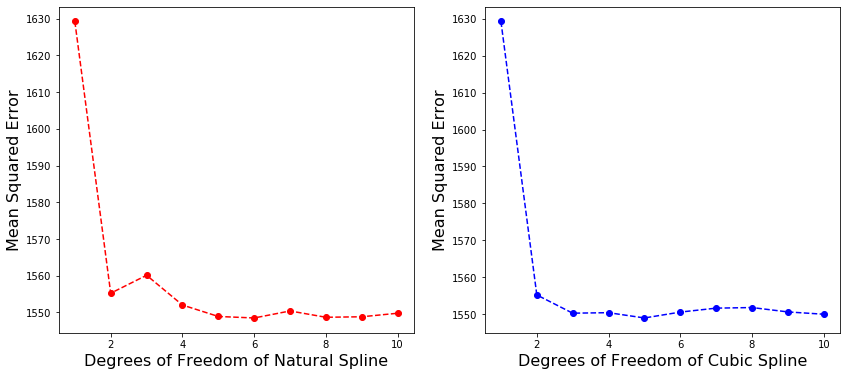

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1,11),msr_natural,'r--o')
plt.xlabel('Degrees of Freedom of Natural Spline',fontsize=16)
plt.ylabel('Mean Squared Error',fontsize=16)
plt.subplot(1,2,2)
plt.plot(range(1,11),msr_cubic,'b--o')
plt.xlabel('Degrees of Freedom of Cubic Spline',fontsize=16)
plt.ylabel('Mean Squared Error',fontsize=16)
plt.show()

**7.4.5 Comparison to Polynomial Regression**

**FIGURE 7.7.**

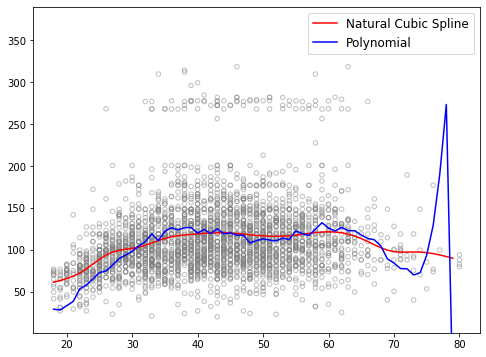

In [12]:
plt.figure(figsize=(8,6))
fit1 = smf.ols('wage ~ cr(age,df = 15)',data = Wage).fit()
fit2 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',15)),data = Wage).fit()
preds1 = fit1.predict(age_grid)
preds2 = fit2.predict(age_grid)
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=20,alpha = 0.5)
plt.plot(agelims,preds1,'r', label='Natural Cubic Spline')
plt.plot(agelims,preds2,'b', label='Polynomial')
plt.legend(['Natural Cubic Spline','Polynomial'],fontsize=12)
plt.ylim(1,390)
plt.show()

# 7.5 Smoothing Splines

**7.5.1 An Overview of Smoothing Splines**

**7.5.2 Choosing the Smoothing Parameter λ**

**FIGURE 7.8.**

未能找到PYTHON实现方案

# 7.6 Local Regression

**FIGURE 7.9.**

未能找到PYTHON实现方案

**FIGURE 7.10.**

未能找到PYTHON实现方案

# 7.7 Generalized Additive Models

**7.7.1 GAMs for Regression Problems**

**FIGURE 7.11**

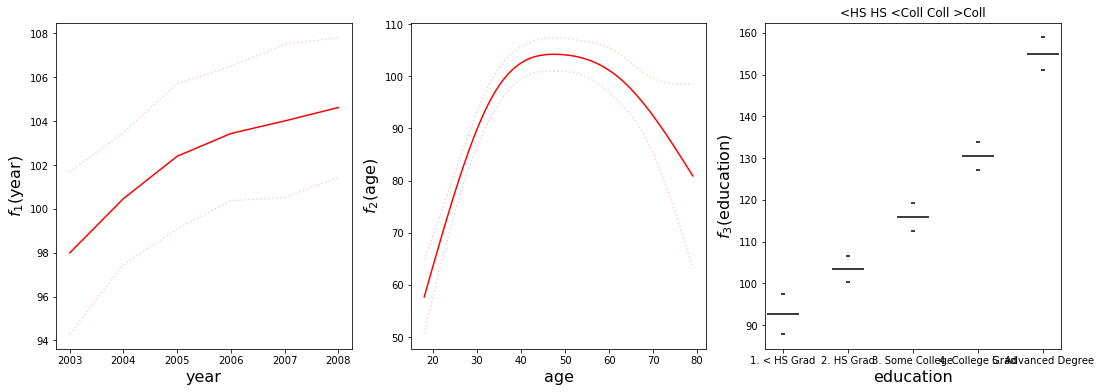

In [13]:
gam1 = smf.ols('wage ~ cr(year,4) + cr(age,5) + education', data=Wage).fit()
age_grid_plot = pd.DataFrame(agelims,columns = ['age'])
age_grid_plot['year'] =  Wage['year'].median()
age_grid_plot['education'] = Wage['education'].value_counts().index[0]
yearlims = np.arange(Wage['year'].min(),Wage['year'].max())
year_grid_plot  = pd.DataFrame(yearlims,columns = ['year'])
year_grid_plot['age'] =  Wage['age'].median()
year_grid_plot['education'] = Wage['education'].value_counts().index[0]
educationlims = ['1. < HS Grad','2. HS Grad','3. Some College','4. College Grad','5. Advanced Degree']
education_grid_plot  = pd.DataFrame(educationlims,columns = ['education'])
education_grid_plot['age'] =  Wage['age'].median()
education_grid_plot['year'] =  Wage['year'].median()
age_pre = gam1.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam1.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam1.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,year_pre_summary['mean'],'r')
plt.plot(yearlims,year_pre_summary['mean_ci_lower'],'r:',alpha = 0.2)
plt.plot(yearlims,year_pre_summary['mean_ci_upper'],'r:',alpha = 0.2)
plt.xlabel('year',fontsize=16)
plt.ylabel(r"$f_1$(year)",fontsize=16)
plt.subplot(132)
plt.plot(agelims,age_pre_summary['mean'],'r')
plt.plot(agelims,age_pre_summary['mean_ci_lower'],'r:',alpha = 0.2)
plt.plot(agelims,age_pre_summary['mean_ci_upper'],'r:',alpha = 0.2)
plt.xlabel('age',fontsize=16)
plt.ylabel(r"$f_2$(age)",fontsize=16)
plt.subplot(133)
plt.scatter(educationlims,education_pre_summary['mean'],marker = '_',s = 1000,color = 'black')
plt.scatter(educationlims,education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'black')
plt.scatter(educationlims,education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'black')
plt.xlabel('education',fontsize=16)
plt.ylabel(r"$f_3$(education)",fontsize=16)
plt.title('<HS HS <Coll Coll >Coll')
plt.show()

**FIGURE 7.12**

光滑样条未找到可用方法

**7.7.2 GAMs for Classification Problems**

**FIGURE 7.13**

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\genmod\families\links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


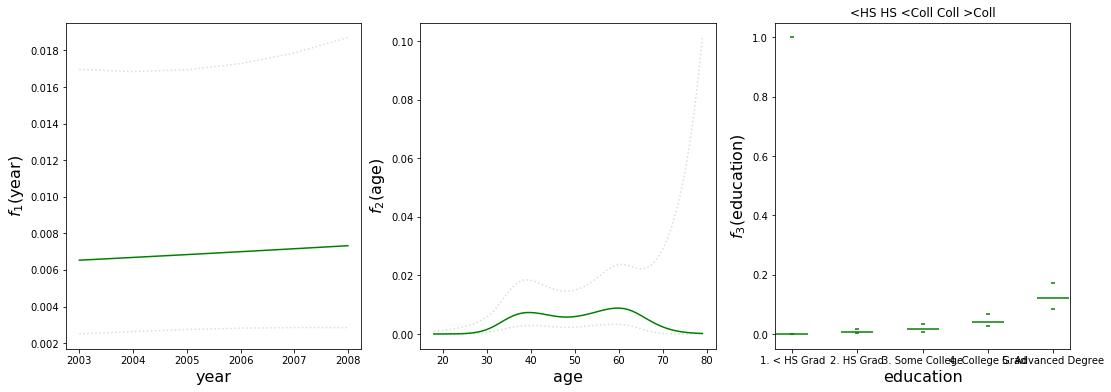

In [14]:
#这里受限于python支持使用了自然样条cr
gam_lr = smf.glm('I(wage >250) ~  year + cr(age,df = 5) + education',data = Wage, family = sm.families.Binomial()).fit()
age_pre = gam_lr.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam_lr.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam_lr.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,1 - year_pre_summary['mean'],'g')
plt.plot(yearlims,1- year_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(yearlims,1- year_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.xlabel('year',fontsize=16)
plt.ylabel(r"$f_1$(year)",fontsize=16)
plt.subplot(132)
plt.plot(agelims,1- age_pre_summary['mean'],'g')
plt.plot(agelims,1 - age_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(agelims,1 - age_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.xlabel('age',fontsize=16)
plt.ylabel(r"$f_2$(age)",fontsize=16)
plt.subplot(133)
plt.scatter(educationlims,1- education_pre_summary['mean'],marker = '_',s = 1000,color = 'g')
plt.scatter(educationlims,1- education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'g')
plt.scatter(educationlims,1 -education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'g')
plt.xlabel('education',fontsize=16)
plt.ylabel(r"$f_3$(education)",fontsize=16)
plt.title('<HS HS <Coll Coll >Coll')
plt.show()

**FIGURE 7.14**

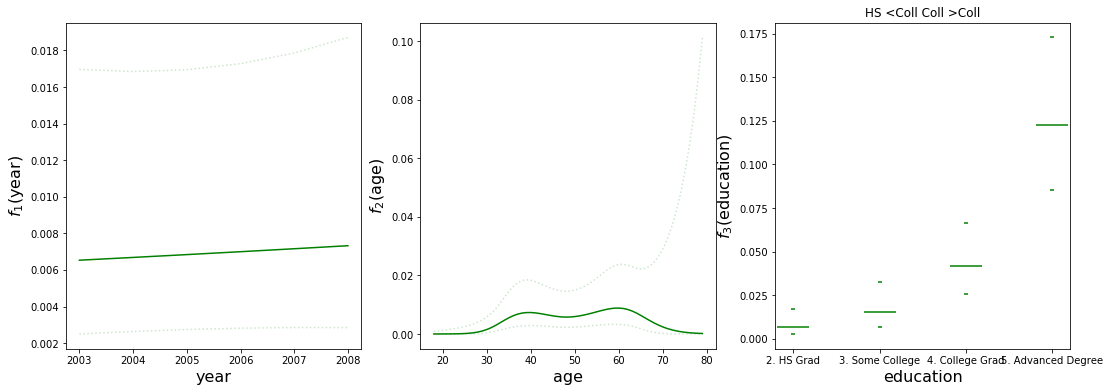

In [15]:
#依然使用自然样条cr
gam_lr = smf.glm('I(wage >250) ~  year + cr(age,df = 5) + education',data = Wage, family = sm.families.Binomial(),
                subset = (Wage['education'] !="1. < HS Grad")).fit()
educationlims = ['2. HS Grad','3. Some College','4. College Grad','5. Advanced Degree']
education_grid_plot  = pd.DataFrame(educationlims,columns = ['education'])
education_grid_plot['age'] =  Wage['age'].median()
education_grid_plot['year'] =  Wage['year'].median()
age_pre = gam_lr.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam_lr.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam_lr.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,1 - year_pre_summary['mean'],'g')
plt.plot(yearlims,1- year_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(yearlims,1- year_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.xlabel('year',fontsize=16)
plt.ylabel(r"$f_1$(year)",fontsize=16)
plt.subplot(132)
plt.plot(agelims,1- age_pre_summary['mean'],'g')
plt.plot(agelims,1 - age_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(agelims,1 - age_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.xlabel('age',fontsize=16)
plt.ylabel(r"$f_2$(age)",fontsize=16)
plt.subplot(133)
plt.scatter(educationlims,1- education_pre_summary['mean'],marker = '_',s = 1000,color = 'g')
plt.scatter(educationlims,1- education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'g')
plt.scatter(educationlims,1 -education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'g')
plt.xlabel('education',fontsize=16)
plt.ylabel(r"$f_3$(education)",fontsize=16)
plt.title('HS <Coll Coll >Coll')
plt.show()